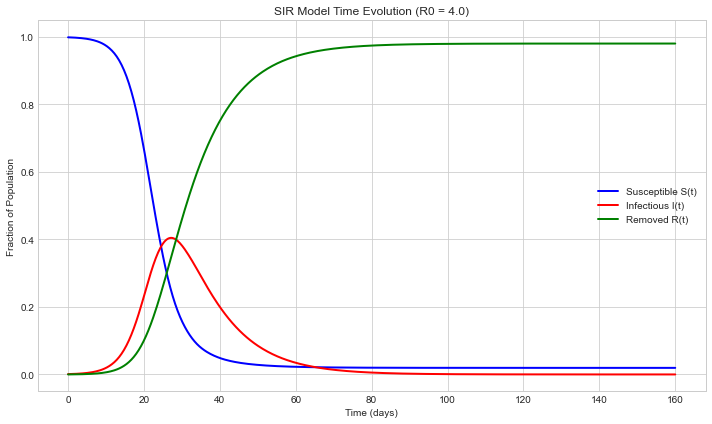

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('seaborn-whitegrid')

# Parameters (using normalized population, N = 1)
N = 1.0
beta = 0.4         # Infection (contact) rate
nu = 0.1           # Recovery rate
R0 = beta * N / nu # Basic reproduction number = 4

def sir_model(t, y):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - nu * I
    dRdt = nu * I
    return [dSdt, dIdt, dRdt]

# Initial conditions: nearly all susceptible, with a very small seed of infection.
y0 = [0.999, 0.001, 0.0]
t_span = (0, 160)
t_eval = np.linspace(0, 160, 500)

sol = solve_ivp(sir_model, t_span, y0, t_eval=t_eval)

plt.figure(figsize=(10,6))
plt.plot(sol.t, sol.y[0], 'b-', lw=2, label='Susceptible S(t)')
plt.plot(sol.t, sol.y[1], 'r-', lw=2, label='Infectious I(t)')
plt.plot(sol.t, sol.y[2], 'g-', lw=2, label='Removed R(t)')
plt.xlabel("Time (days)")
plt.ylabel("Fraction of Population")
plt.title(f"SIR Model Time Evolution (R0 = {R0:.1f})")
plt.legend()
plt.tight_layout()
plt.savefig('SIR_TimeEvolution.pdf', format='pdf')
plt.show()


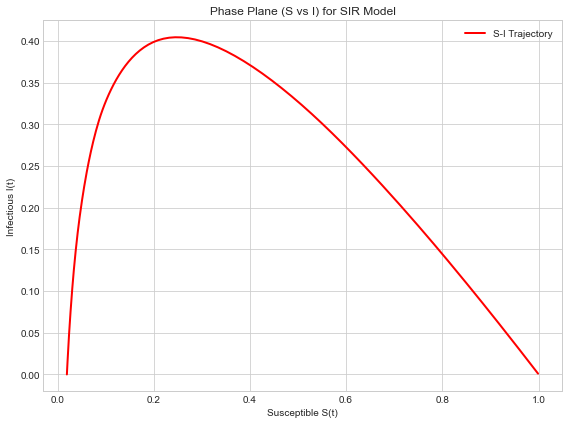

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('seaborn-whitegrid')

# 同じ SIR モデルのパラメータ
N = 1.0
beta = 0.4
nu = 0.1

def sir_model(t, y):
    S, I, R = y
    return [-beta * S * I, beta * S * I - nu * I, nu * I]

y0 = [0.999, 0.001, 0.0]
t_span = (0, 160)
t_eval = np.linspace(0, 160, 500)
sol = solve_ivp(sir_model, t_span, y0, t_eval=t_eval)

plt.figure(figsize=(8,6))
plt.plot(sol.y[0], sol.y[1], 'r-', lw=2, label='S-I Trajectory')
plt.xlabel("Susceptible S(t)")
plt.ylabel("Infectious I(t)")
plt.title("Phase Plane (S vs I) for SIR Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('SIR_PhasePlane_S_vs_I.pdf', format='pdf')
plt.show()

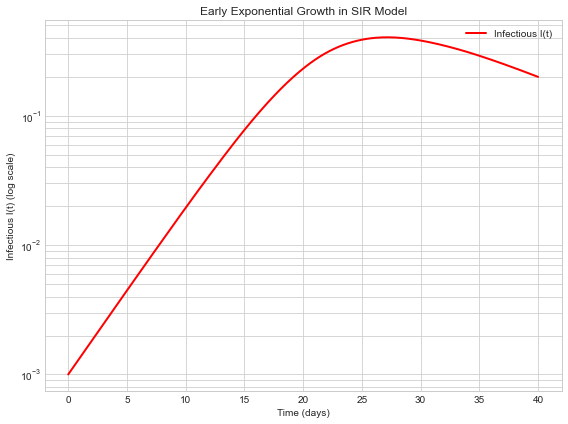

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('seaborn-whitegrid')

# SIR のパラメータ（同じ設定）
N = 1.0
beta = 0.4
nu = 0.1

def sir_model(t, y):
    S, I, R = y
    return [-beta * S * I, beta * S * I - nu * I, nu * I]

# 初期感染者がごくわずかな状態 (early phase)
y0 = [0.999, 0.001, 0.0]
t_span = (0, 40)
t_eval = np.linspace(0, 40, 300)
sol = solve_ivp(sir_model, t_span, y0, t_eval=t_eval)

plt.figure(figsize=(8,6))
plt.semilogy(sol.t, sol.y[1], 'r-', lw=2, label='Infectious I(t)')
plt.xlabel("Time (days)")
plt.ylabel("Infectious I(t) (log scale)")
plt.title("Early Exponential Growth in SIR Model")
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()
plt.savefig('SIR_EarlyExponentialGrowth.pdf', format='pdf')
plt.show()

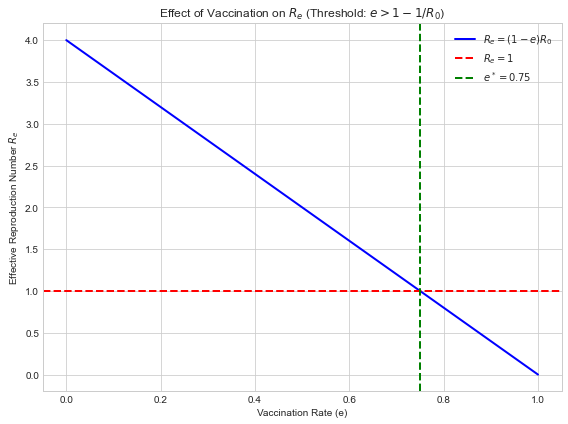

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

R0 = 4.0  # 先のパラメータより
e = np.linspace(0, 1, 200)
Re = (1 - e) * R0
threshold_e = 1 - 1 / R0  # Critical vaccination rate e*

plt.figure(figsize=(8,6))
plt.plot(e, Re, 'b-', lw=2, label=r'$R_e = (1-e) R_0$')
plt.axhline(1, color='red', linestyle='--', lw=2, label=r'$R_e = 1$')
plt.axvline(threshold_e, color='green', linestyle='--', lw=2, label=f'$e^*={threshold_e:.2f}$')
plt.xlabel("Vaccination Rate (e)")
plt.ylabel("Effective Reproduction Number $R_e$")
plt.title("Effect of Vaccination on $R_e$ (Threshold: $e > 1-1/R_0$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('VaccinationThreshold_Re.pdf', format='pdf')
plt.show()

/var/folders/zb/601780_d7mg3ktzvn0smkgzm0000gn/T/ipykernel_90077/1004542780.py:9: RuntimeWarning: invalid value encountered in true_divide
  return S_inf - S0 * np.exp(-R0 * (1 - S_inf / S0))
/var/folders/zb/601780_d7mg3ktzvn0smkgzm0000gn/T/ipykernel_90077/1004542780.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return S_inf - S0 * np.exp(-R0 * (1 - S_inf / S0))
/var/folders/zb/601780_d7mg3ktzvn0smkgzm0000gn/T/ipykernel_90077/1004542780.py:9: RuntimeWarning: invalid value encountered in multiply
  return S_inf - S0 * np.exp(-R0 * (1 - S_inf / S0))
/Users/ryamaguchi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


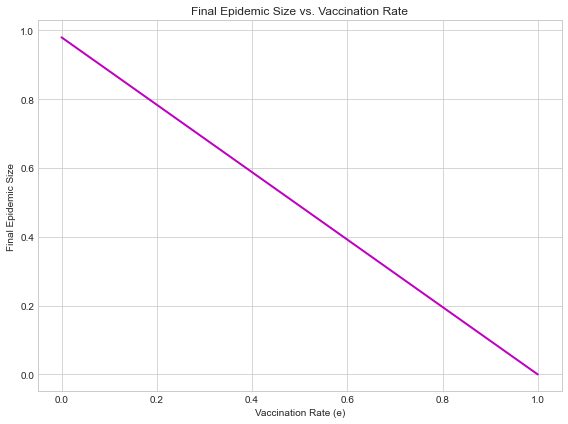

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

plt.style.use('seaborn-whitegrid')

R0 = 4.0  # Basic reproduction number
def final_size_equation(S_inf, S0, R0):
    return S_inf - S0 * np.exp(-R0 * (1 - S_inf / S0))

e_values = np.linspace(0, 1, 100)
final_epidemic_sizes = []

for e in e_values:
    S0 = 1 - e  # Fraction of population remaining susceptible after vaccination.
    # Solve for S_inf in the range (0, S0)
    S_inf_solution, = fsolve(final_size_equation, S0 * 0.5, args=(S0, R0))
    epidemic_size = S0 - S_inf_solution  # Epidemic size: decrease in susceptible fraction
    final_epidemic_sizes.append(epidemic_size)

plt.figure(figsize=(8,6))
plt.plot(e_values, final_epidemic_sizes, 'm-', lw=2)
plt.xlabel("Vaccination Rate (e)")
plt.ylabel("Final Epidemic Size")
plt.title("Final Epidemic Size vs. Vaccination Rate")
plt.grid(True)
plt.tight_layout()
plt.savefig('FinalEpidemicSize_vs_Vaccination.pdf', format='pdf')
plt.show()